Normalization bias

In [3]:
import ehrapy as ep
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings("ignore")

In [30]:
# cohorttracker color palette
colors = sns.color_palette("colorblind", n_colors=14)

In [4]:
adata = ep.dt.diabetes_130_fairlearn()
ep.ad.move_to_obs(adata, to_obs=["age", "num_medications"], copy_obs=True)

adata.obs["Age Group"] = np.where(adata.obs['age'] == "'30 years or younger'", 'Younger than 30', 'Older than 30')
ep.ad.infer_feature_types(adata)
adata = ep.pp.encode(adata, autodetect=True)

 Detected feature types for AnnData object with 101766 obs and 24 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╠══ num_lab_procedures
║   ╚══ num_medications
╚══ 🗂️ Categorical features
    ╠══ A1Cresult (3 categories)
    ╠══ admission_source_id (3 categories)
    ╠══ age (3 categories)
    ╠══ change (2 categories)
    ╠══ diabetesMed (2 categories)
    ╠══ discharge_disposition_id (2 categories)
    ╠══ gender (3 categories)
    ╠══ had_emergency (2 categories)
    ╠══ had_inpatient_days (2 categories)
    ╠══ had_outpatient_days (2 categories)
    ╠══ insulin (4 categories)
    ╠══ max_glu_serum (3 categories)
    ╠══ medicaid (2 categories)
    ╠══ medical_specialty (6 categories)
    ╠══ medicare (2 categories)
    ╠══ num_procedures (7 categories)
    ╠══ number_diagnoses (16 categories)
    ╠══ primary_diagnosis (5 categories)
    ╠══ race (6 categories)
    ╠══ readmit_binary (2 categories)
    ╠══ readmitted (3 categories)
    ╚══ time_in_hospital (14 categories)

Output()

In [6]:
adata_scaled_together = ep.pp.scale_norm(adata, vars="num_medications", copy=True)
adata_scaled_separate = ep.pp.scale_norm(adata, vars="num_medications", group_key="Age Group", copy=True)

In [24]:
colors = sns.color_palette("colorblind", n_colors=14)
colors[2]

In [33]:
def plot_hist_normalization(adata, adata_scaled_together, adata_scaled_separate, batch_key="age_group", var_of_interest="num_medications", pretty_name="num_medications"):
    """Plot histogram of original data, jointly normalized, and split normalization (by batch_key variable)."""

    fig, axs = plt.subplots(1, 3, figsize=(21, 5))

    # plot raw adata
    cols = [colors[10], colors[11]]

    for i, group in enumerate(adata.obs[batch_key].unique()):
        adata_group = adata[adata.obs[batch_key] == group, var_of_interest]
        axs[0].hist(
            adata_group.X,
            bins=10,
            alpha=0.7,
            label=group,
            orientation="horizontal",
            weights = np.ones(len(adata_group)) / len(adata_group),
            color=cols[i]
        )
        axs[0].set_ylabel(pretty_name)
        axs[0].set_xlabel("% of stays per group")
        axs[0].legend(title=batch_key)
        axs[0].set_title(f"Original Distributions of {pretty_name}")

    # plot together normalized data
    for i, group in enumerate(adata_scaled_together.obs[batch_key].unique()):
        adata_group = adata_scaled_together[adata_scaled_together.obs[batch_key] == group, var_of_interest]
        axs[1].hist(
            adata_group.X,
            bins=10,
            alpha=0.7,
            label=group,
            orientation="horizontal",
            weights = np.ones(len(adata_group)) / len(adata_group),
            color=cols[i]
        )
        axs[1].set_ylabel(pretty_name)
        axs[1].set_xlabel("% of stays per group")
        axs[1].legend(title=batch_key)
        axs[1].set_title(f"Joined Normalization of {pretty_name}")

    # plot separately normalized data
    for i, group in enumerate(adata_scaled_separate.obs[batch_key].unique()):
        adata_group = adata_scaled_separate[adata_scaled_separate.obs[batch_key] == group, var_of_interest]
        axs[2].hist(
            adata_group.X,
            bins=10,
            alpha=0.7,
            label=group,
            orientation="horizontal",
            weights = np.ones(len(adata_group)) / len(adata_group),
            color=cols[i]
        )
        axs[2].set_ylabel(pretty_name)
        axs[2].set_xlabel("% of stays per group")
        axs[2].legend(title=batch_key)
        axs[2].set_title(f"Separate Normalization of {pretty_name}")

    # plt.tight_layout()
    #plt.show()

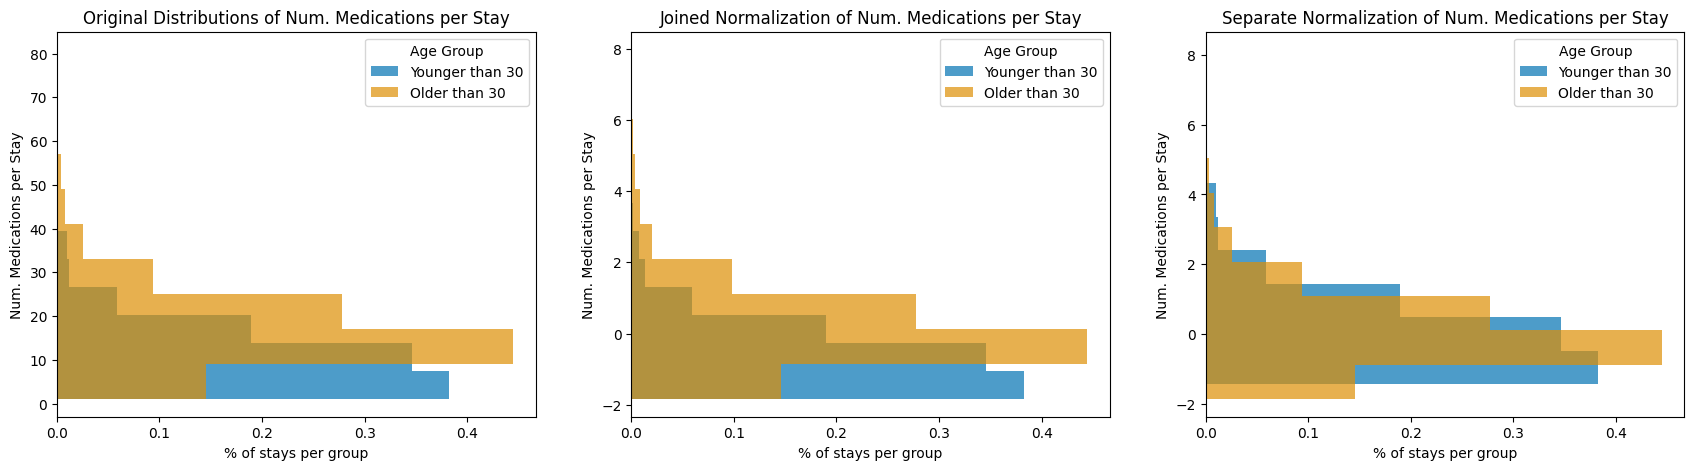

In [34]:
plot_hist_normalization(adata, adata_scaled_together, adata_scaled_separate, batch_key="Age Group", var_of_interest="num_medications", pretty_name="Num. Medications per Stay")
plt.savefig("normalization_bias.png", dpi=300, bbox_inches='tight')